In [48]:
try:
    import pandas, openpyxl, plotly

except ImportError as e:
    !pip install pandas openpyxl plotly

In [70]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [209]:
home_premiums = 'data/home.xlsx'
home_df = pd.read_excel(home_premiums)
display(home_df)

,DATE,INSURER,PREMIUM,DWELLING COVERAGE,OTHER STRUCTURES PROTECTION,PERSONAL PROPERTY PROTECTION,ADDITIONAL LIVING EXPENSE,FAMILY LIABILITY PROTECTION,GUEST MEDICAL PROTECTION,BUILDING CODES,WATER BACK-UP
0,2020-09-29,ALLSTATE,1048.32,337165,50575,252874,84292,300000,1000,33717,10000
1,2021-09-21,ALLSTATE,1334.49,363770,54566,272828,90943,300000,1000,36377,10000
2,2022-09-20,ALLSTATE,1507.72,410945,61642,308209,102737,300000,1000,41095,10000
3,2023-09-20,ALLSTATE,1850.19,454323,68149,340743,113581,300000,1000,45433,10000
4,2024-09-19,ALLSTATE,2166.50,479218,71883,359414,119805,300000,1000,47922,10000
5,2024-10-10,NATIONAL GENERAL,2610.00,480000,48000,240000,96000,500000,5000,48000,25000


In [232]:
premiums_df = home_df[['DATE', 'INSURER', 'PREMIUM']]
coverages_df = home_df.drop(columns=['PREMIUM'])

display(premiums_df)
display(coverages_df)

,DATE,INSURER,PREMIUM
0,2020-09-29,ALLSTATE,1048.32
1,2021-09-21,ALLSTATE,1334.49
2,2022-09-20,ALLSTATE,1507.72
3,2023-09-20,ALLSTATE,1850.19
4,2024-09-19,ALLSTATE,2166.50
5,2024-10-10,NATIONAL GENERAL,2610.00


,DATE,INSURER,DWELLING COVERAGE,OTHER STRUCTURES PROTECTION,PERSONAL PROPERTY PROTECTION,ADDITIONAL LIVING EXPENSE,FAMILY LIABILITY PROTECTION,GUEST MEDICAL PROTECTION,BUILDING CODES,WATER BACK-UP
0,2020-09-29,ALLSTATE,337165,50575,252874,84292,300000,1000,33717,10000
1,2021-09-21,ALLSTATE,363770,54566,272828,90943,300000,1000,36377,10000
2,2022-09-20,ALLSTATE,410945,61642,308209,102737,300000,1000,41095,10000
3,2023-09-20,ALLSTATE,454323,68149,340743,113581,300000,1000,45433,10000
4,2024-09-19,ALLSTATE,479218,71883,359414,119805,300000,1000,47922,10000
5,2024-10-10,NATIONAL GENERAL,480000,48000,240000,96000,500000,5000,48000,25000


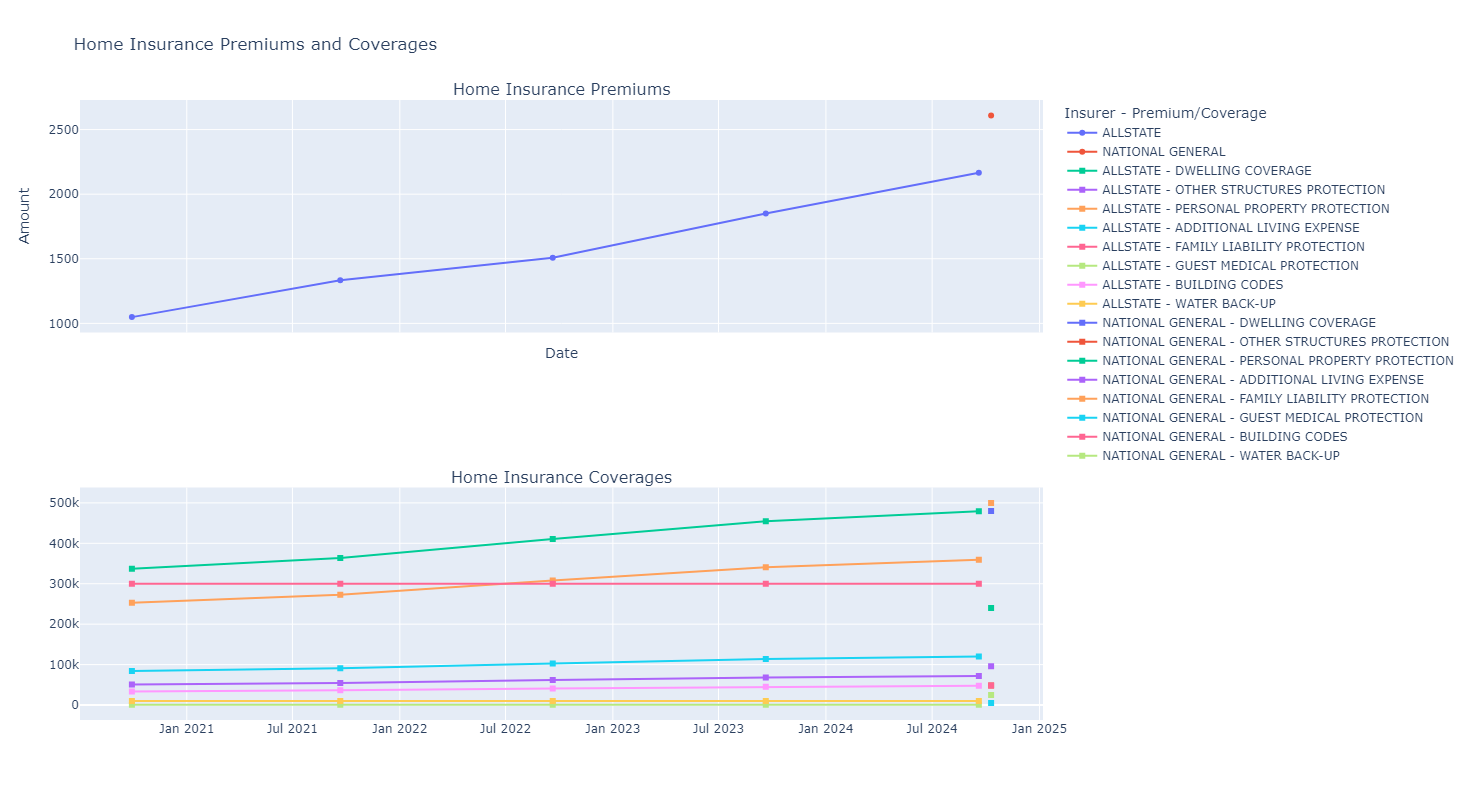

In [260]:
home_premiums = go.Figure()
home_coverages = go.Figure()

home = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Home Insurance Premiums', 'Home Insurance Coverages'))

for insurer in premiums_df['INSURER'].unique():
    insurer_df = premiums_df[premiums_df['INSURER'] == insurer]
    home.add_trace(go.Scatter(
        x=insurer_df['DATE'],
        y=insurer_df['PREMIUM'],
        mode='lines+markers',
        name=insurer,
        marker=dict(symbol='circle')
    ), row=1, col=1)

# home_premiums.update_layout(
#     title='Home Insurance Premiums',
#     xaxis_title='Date',
#     yaxis_title='Premium',
#     legend_title='Insurer',
#     hovermode='x unified'
# )

for insurer in coverages_df['INSURER'].unique():
    insurer_df = coverages_df[coverages_df['INSURER'] == insurer]
    for col in coverages_df.columns[2:]:
        home.add_trace(go.Scatter(
            x=insurer_df['DATE'],
            y=insurer_df[col],
            mode='lines+markers',
            name=f'{insurer} - {col}',
            marker=dict(symbol='square')
        ), row=2, col=1)

# home_coverages.update_layout(
#     title='Home Insurance Coverages',
#     xaxis_title='Date',
#     yaxis_title='Amount',
#     legend_title='Insurer - Coverage',
#     hovermode='x unified'
# )

home.update_layout(
    title='Home Insurance Premiums and Coverages',
    xaxis_title='Date',
    yaxis_title='Amount',
    legend_title='Insurer - Premium/Coverage',
    hovermode='x unified',
    height=800
)

# home_premiums.show()
# home_coverages.show()

home.show()

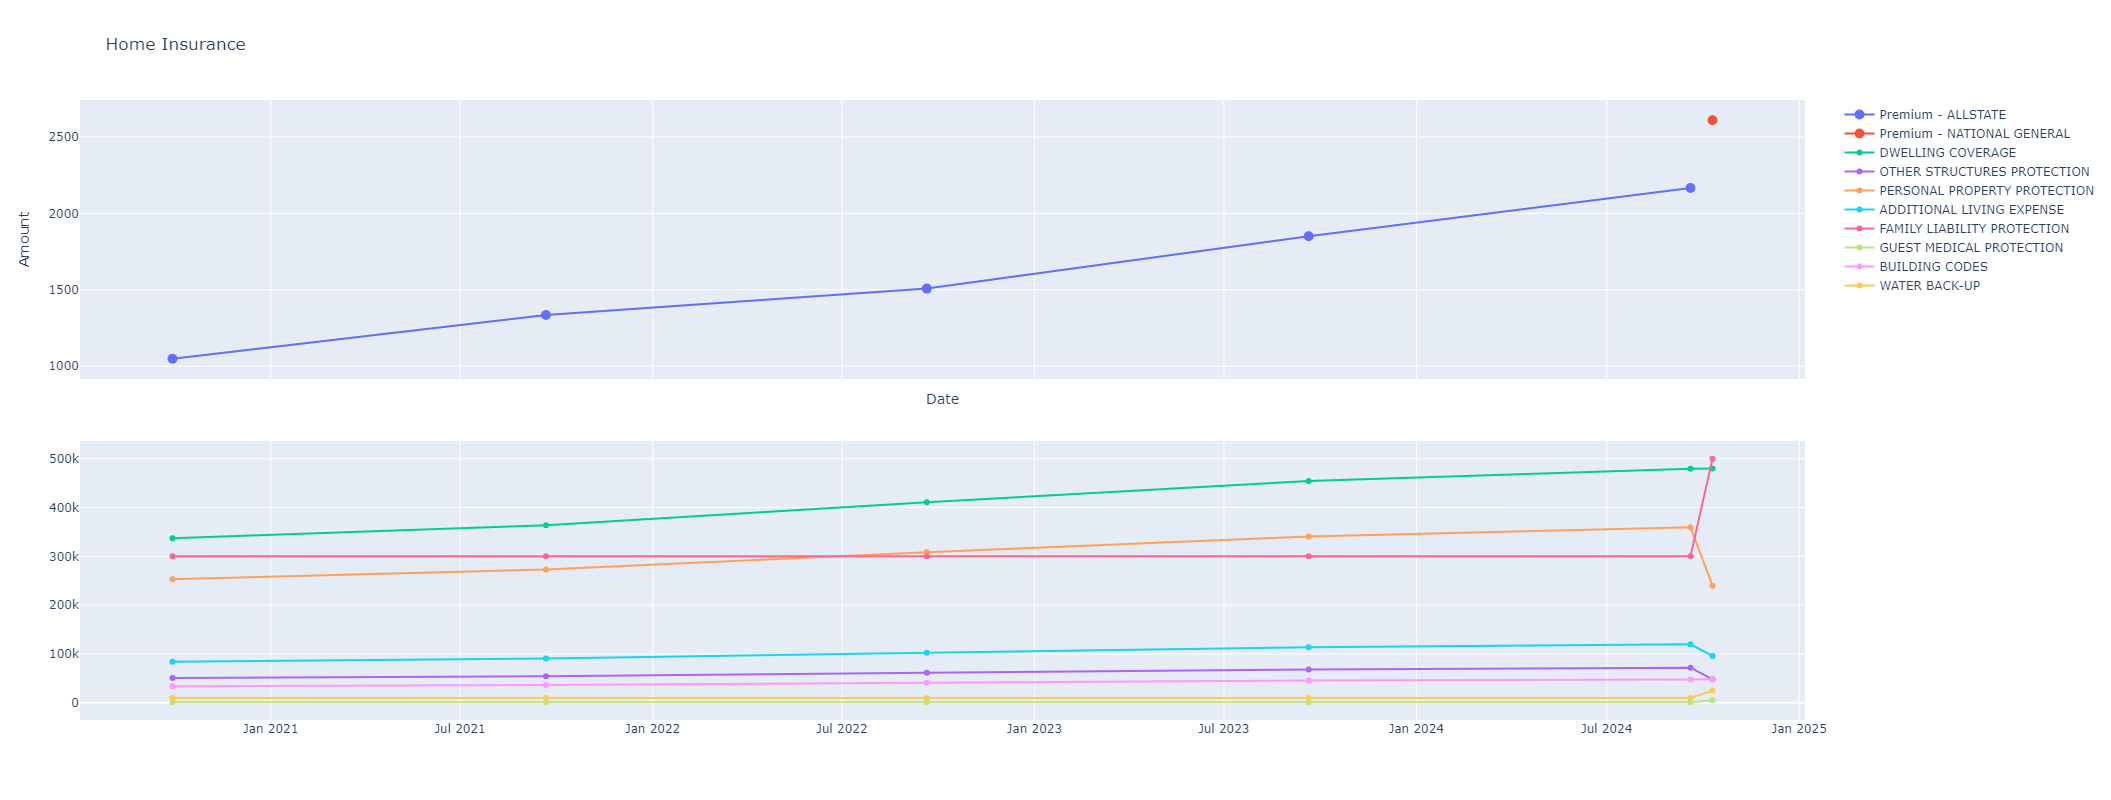

In [221]:


home = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

for insurer in home_df['INSURER'].unique():
    insurer_df = home_df[home_df['INSURER'] == insurer]
    home.add_trace(go.Scatter(
        x=insurer_df['DATE'],
        y=insurer_df['PREMIUM'],
        mode='lines+markers',
        name=f'Premium - {insurer}',
        marker=dict(size=10, symbol='circle')
    ), row=1, col=1)

for col in home_df.columns[3:]:
    home.add_trace(go.Scatter(
        x=home_df['DATE'],
        y=home_df[col],
        mode='lines+markers',
        name=col
    ), row=2, col=1)

home.update_layout(
    title='Home Insurance',
    xaxis_title='Date',
    yaxis_title='Amount',
    hovermode='x unified',
    height=800
)

home.update_xaxes(showspikes=True, spikecolor='grey', spikemode='across')

home.show()

In [195]:
auto_premiums = 'data/auto.xlsx'
claims = 'data/auto_claims.xlsx'
auto_df = pd.read_excel(auto_premiums)
claims_df = pd.read_excel(claims)
display(auto_df)
display(claims_df)

,DATE,2017 HYUNDAI SONATA,2020 TOYOTA TACOMA,2012 CHEVY CRUZE,2016 TOYOTA COROLLA,2003 HONDA ACCORD,TOTAL
0,2020-09-30,427.44,507.37,NaN,NaN,NaN,934.81
1,2021-04-02,471.24,569.14,NaN,NaN,NaN,1040.38
2,2021-05-01,515.87,609.99,345.90,NaN,NaN,1471.76
3,2021-10-05,515.87,611.96,345.90,NaN,NaN,1473.73
4,2022-03-04,688.08,741.65,479.80,NaN,NaN,1909.53
5,2022-03-10,677.24,732.67,472.00,NaN,NaN,1881.91
6,2022-04-02,820.45,918.97,580.56,NaN,NaN,2319.98
7,2022-10-06,1020.97,1112.75,758.72,NaN,NaN,2892.44
8,2022-10-29,1105.87,1184.27,NaN,NaN,NaN,2290.14
9,2023-01-18,828.38,929.10,NaN,692.67,NaN,2450.15


,DATE,CLAIM NUMBER,VEHICLE,TYPE,AMOUNT
0,2022-01-31,657871935,2012 CHEVY CRUZE,TOW,51.35
1,2022-10-13,688598976,2012 CHEVY CRUZE,TOW,45.90
2,2022-10-13,688968882,2012 CHEVY CRUZE,CRASH/TOTALED,10010.40
3,2023-05-06,712923150,2016 TOYOTA COROLLA,CRASH/TOTALED,27043.08
4,2024-07-07,761147792,2017 HYUNDAI SONATA,CRASH/ANIMAL,NaN


In [196]:
total_df = auto_df[['DATE', 'TOTAL']]
display(total_df)

,DATE,TOTAL
0,2020-09-30,934.81
1,2021-04-02,1040.38
2,2021-05-01,1471.76
3,2021-10-05,1473.73
4,2022-03-04,1909.53
5,2022-03-10,1881.91
6,2022-04-02,2319.98
7,2022-10-06,2892.44
8,2022-10-29,2290.14
9,2023-01-18,2450.15


In [197]:
filtered_auto_df = auto_df.drop(columns=['TOTAL'])
display(filtered_auto_df)

melted_auto_df = filtered_auto_df.melt(id_vars=['DATE'], var_name='VEHICLE', value_name='PREMIUM')
melted_auto_df = melted_auto_df.dropna(subset=['PREMIUM'])
display(melted_auto_df)

,DATE,2017 HYUNDAI SONATA,2020 TOYOTA TACOMA,2012 CHEVY CRUZE,2016 TOYOTA COROLLA,2003 HONDA ACCORD
0,2020-09-30,427.44,507.37,NaN,NaN,NaN
1,2021-04-02,471.24,569.14,NaN,NaN,NaN
2,2021-05-01,515.87,609.99,345.90,NaN,NaN
3,2021-10-05,515.87,611.96,345.90,NaN,NaN
4,2022-03-04,688.08,741.65,479.80,NaN,NaN
5,2022-03-10,677.24,732.67,472.00,NaN,NaN
6,2022-04-02,820.45,918.97,580.56,NaN,NaN
7,2022-10-06,1020.97,1112.75,758.72,NaN,NaN
8,2022-10-29,1105.87,1184.27,NaN,NaN,NaN
9,2023-01-18,828.38,929.10,NaN,692.67,NaN


,DATE,VEHICLE,PREMIUM
0,2020-09-30,2017 HYUNDAI SONATA,427.44
1,2021-04-02,2017 HYUNDAI SONATA,471.24
2,2021-05-01,2017 HYUNDAI SONATA,515.87
3,2021-10-05,2017 HYUNDAI SONATA,515.87
4,2022-03-04,2017 HYUNDAI SONATA,688.08
5,2022-03-10,2017 HYUNDAI SONATA,677.24
6,2022-04-02,2017 HYUNDAI SONATA,820.45
7,2022-10-06,2017 HYUNDAI SONATA,1020.97
8,2022-10-29,2017 HYUNDAI SONATA,1105.87
9,2023-01-18,2017 HYUNDAI SONATA,828.38


In [198]:
filtered_claims = claims_df[['DATE', 'VEHICLE']]
display(filtered_claims)

,DATE,VEHICLE
0,2022-01-31,2012 CHEVY CRUZE
1,2022-10-13,2012 CHEVY CRUZE
2,2022-10-13,2012 CHEVY CRUZE
3,2023-05-06,2016 TOYOTA COROLLA
4,2024-07-07,2017 HYUNDAI SONATA


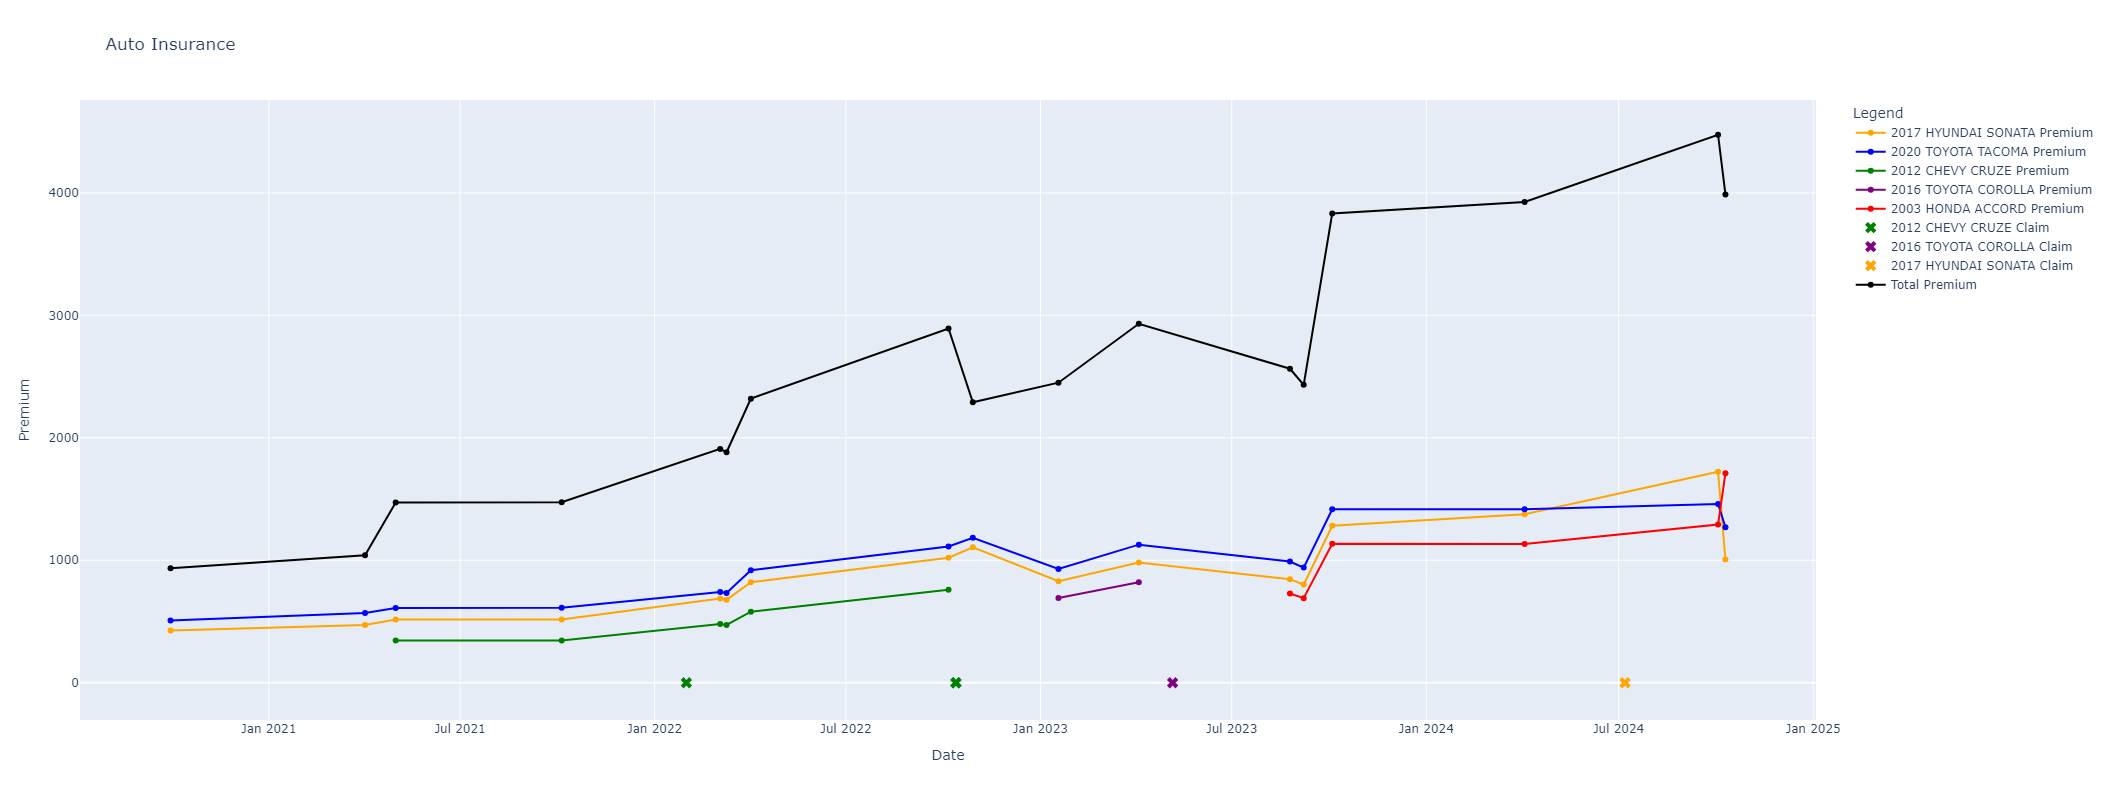

In [199]:
vehicle_colors = {
    '2020 TOYOTA TACOMA': 'blue',
    '2012 CHEVY CRUZE': 'green',
    '2016 TOYOTA COROLLA': 'purple',
    '2017 HYUNDAI SONATA': 'orange',
    '2003 HONDA ACCORD': 'red'
}

auto = go.Figure()

for vehicle in melted_auto_df['VEHICLE'].unique():
    vehicle_df = melted_auto_df[melted_auto_df['VEHICLE'] == vehicle]
    auto.add_trace(go.Scatter(
        x=vehicle_df['DATE'],
        y=vehicle_df['PREMIUM'],
        mode='lines+markers',
        marker=dict(color=vehicle_colors.get(vehicle)),
        name=f'{vehicle} Premium'
    ))

for vehicle in claims_filtered['VEHICLE'].unique():
    vehicle_df = claims_filtered[claims_filtered['VEHICLE'] == vehicle]
    auto.add_trace(go.Scatter(
        x=vehicle_df['DATE'],
        y=[0]*len(vehicle_df),
        mode='markers',
        name=f'{vehicle} Claim',
        marker=dict(size=10, symbol='x', color=vehicle_colors.get(vehicle))
    ))

auto.add_trace(go.Scatter(
    x=total_df['DATE'],
    y=total_df['TOTAL'],
    mode='lines+markers',
    marker=dict(color='black'),
    name='Total Premium'
))

auto.update_layout (
    title='Auto Insurance',
    xaxis_title = 'Date',
    yaxis_title = 'Premium',
    legend_title = 'Legend',
    hovermode='x unified',
    height=800
)

auto.show()